In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.describe()
#train.info()
#train.describe(include=['O'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()
test.info()
test.describe(include=['O'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Sweet, Mr. George Frederick",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# A) about Sex

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3774bce240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f3772b5f710>], dtype=object)

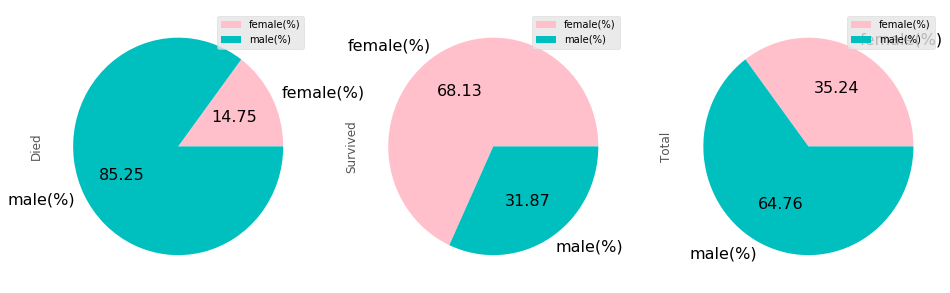

In [6]:
total_male_count = train[(train["Sex"]=='male')]["Name"].count()
total_female_count = train[(train["Sex"]=='female')]["Name"].count()

survived_male_count = train[(train["Survived"]==1) & (train["Sex"]=='male')]["Name"].count()
survived_female_count = train[(train["Survived"]==1) & (train["Sex"]=='female')]["Name"].count()

dead_male_count = train[(train["Survived"]==0) & (train["Sex"]=='male')]["Name"].count()
dead_female_count = train[(train["Survived"]==0) & (train["Sex"]=='female')]["Name"].count()

df = pd.DataFrame({'Died':[dead_female_count, dead_male_count], 
                   'Survived':[survived_female_count, survived_male_count], 
                  'Total':[total_female_count, total_male_count]}, 
                  index=['female(%)', 'male(%)'] )

df.plot(kind='pie', subplots=True, autopct='%.2f', fontsize=16, figsize=(16,5), colors=['pink', 'c'])


# B) about sex & age

In [7]:
train[(train["Sex"]=="male")]["Age"].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [117]:
for title in ["Mr.", "Sir.", "Dr.", "Major.", "Master."]:
    num = X_train[(X_train['Name'].str.contains(title))]["Name"].count()
    age = X_train[(X_train['Name'].str.contains(title))]["Age"].mean()
    
    print("{} --> {} males, Age average is {}".format(title, num, age))

print("-------------------------------------------------------------")

for title in ["Ms.", "Miss.", "Mrs.", "Lady."]:
    num = X_train[(X_train['Name'].str.contains(title))]["Name"].count()
    age = X_train[(X_train['Name'].str.contains(title))]["Age"].mean()
    
    print("{} --> {} females, Age average is {}".format(title, num, age))

Mr. --> 959 males, Age average is 33.32208994708995
Sir. --> 3 males, Age average is 35.5
Dr. --> 17 males, Age average is 37.266666666666666
Major. --> 2 males, Age average is 48.5
Master. --> 61 males, Age average is 5.482641509433963
-------------------------------------------------------------
Ms. --> 2 females, Age average is 28.0
Miss. --> 260 females, Age average is 21.774238095238097
Mrs. --> 201 females, Age average is 36.804597701149426
Lady. --> 1 females, Age average is 48.0


In [118]:
for title in ["Mr.", "Sir.", "Dr.", "Major.", "Master."]:
    num_survived = X_train[(X_train['Survived']==1) & (X_train['Name'].str.contains(title))]["Name"].count()
    num_died = X_train[(X_train['Survived']==0) & (X_train['Name'].str.contains(title))]["Name"].count()
    #print(num_survived, num_died)
    print("{} total:{} --> {} survived, {} died. {}% survived".format(title, num_survived+num_died, num_survived, num_died, (100*num_survived/(num_survived+num_died))))

print("-------------------------------------------------------------")

for title in ["Ms.", "Miss.", "Mrs.", "Lady."]:
    num_survived = X_train[(X_train['Survived']==1) & (X_train['Name'].str.contains(title))]["Name"].count()
    num_died = X_train[(X_train['Survived']==0) & (X_train['Name'].str.contains(title))]["Name"].count()
    
    print("{} total:{} --> {} survived, {} died. {}% survived".format(title, num_survived+num_died, num_survived, num_died, (100*num_survived/(num_survived+num_died))))

Mr. total:647 --> 184 survived, 463 died. 28.438948995363216% survived
Sir. total:3 --> 1 survived, 2 died. 33.333333333333336% survived
Dr. total:11 --> 6 survived, 5 died. 54.54545454545455% survived
Major. total:2 --> 1 survived, 1 died. 50.0% survived
Master. total:40 --> 23 survived, 17 died. 57.5% survived
-------------------------------------------------------------
Ms. total:1 --> 1 survived, 0 died. 100.0% survived
Miss. total:182 --> 127 survived, 55 died. 69.78021978021978% survived
Mrs. total:129 --> 102 survived, 27 died. 79.06976744186046% survived
Lady. total:1 --> 1 survived, 0 died. 100.0% survived


In [16]:
train['Family'] = train['Parch'] + train['SibSp']
test['Family'] = test['Parch'] + test['SibSp']

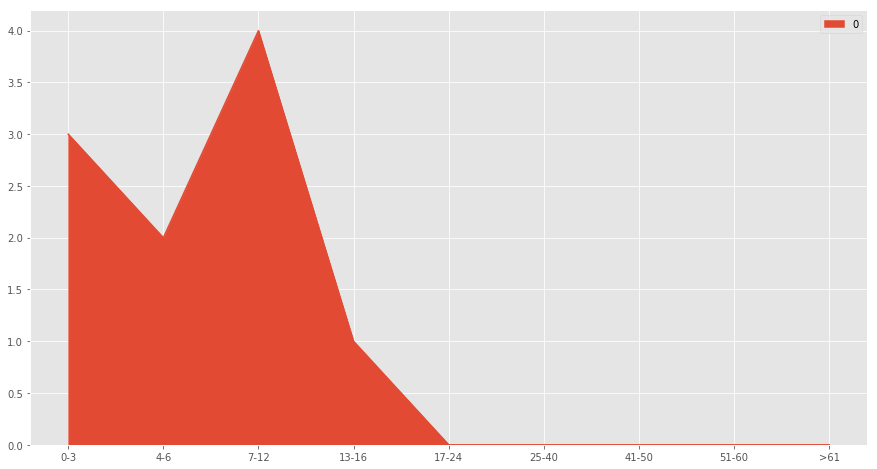

In [20]:
age0 = train[(train["Age"]<=3)]["Family"].median()
age1 = train[(train["Age"]>3) & (train["Age"]<=6)]["Family"].median()
age2 = train[(train["Age"]>6) & (train["Age"]<=12)]["Family"].median()
age3 = train[(train["Age"]>12) & (train["Age"]<=16)]["Family"].median()
age4 = train[(train["Age"]>16) & (train["Age"]<=24)]["Family"].median()
age5 = train[(train["Age"]>24) & (train["Age"]<=40)]["Family"].median()
age6 = train[(train["Age"]>40) & (train["Age"]<=50)]["Family"].median()
age7 = train[(train["Age"]>50) & (train["Age"]<=60)]["Family"].median()
age8 = train[(train["Age"]>60)]["Family"].median()

df = pd.DataFrame(np.array([[age0], [age1], [age2],[age3], [age4], [age5],[age6], [age7], [age8],]),
                  index=['0-3','4-6','7-12','13-16','17-24','25-40','41-50','51-60','>61'])
df.plot.area(stacked=True, figsize=(15,8))

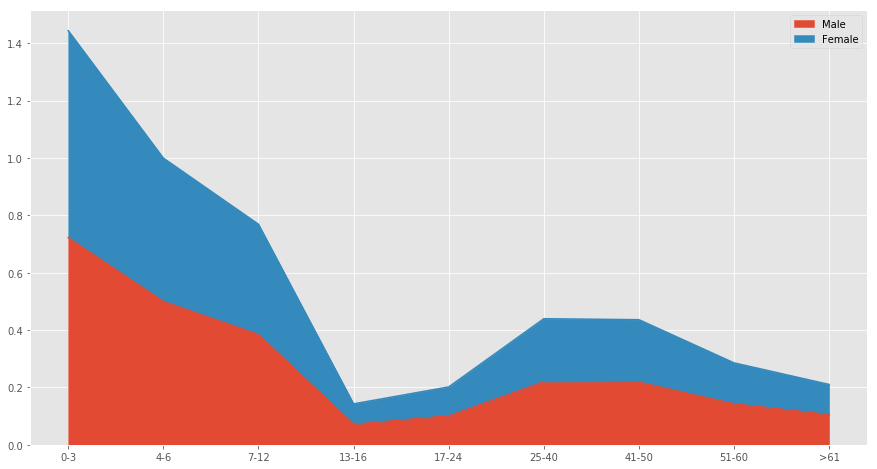

In [14]:
male_age0 = train[(train["Sex"]=='male') & (train["Age"]<=3)]["Survived"].mean()
male_age1 = train[(train["Sex"]=='male') & (train["Age"]>3) & (train["Age"]<=6)]["Survived"].mean()
male_age2 = train[(train["Sex"]=='male') & (train["Age"]>6) & (train["Age"]<=12)]["Survived"].mean()
male_age3 = train[(train["Sex"]=='male') & (train["Age"]>12) & (train["Age"]<=16)]["Survived"].mean()
male_age4 = train[(train["Sex"]=='male') & (train["Age"]>16) & (train["Age"]<=24)]["Survived"].mean()
male_age5 = train[(train["Sex"]=='male') & (train["Age"]>24) & (train["Age"]<=40)]["Survived"].mean()
male_age6 = train[(train["Sex"]=='male') & (train["Age"]>40) & (train["Age"]<=50)]["Survived"].mean()
male_age7 = train[(train["Sex"]=='male') & (train["Age"]>50) & (train["Age"]<=60)]["Survived"].mean()
male_age8 = train[(train["Sex"]=='male') & (train["Age"]>60)]["Survived"].mean()

female_age0 = train[(train["Sex"]=='male') & (train["Age"]<=3)]["Survived"].mean()
female_age1 = train[(train["Sex"]=='male') & (train["Age"]>3) & (train["Age"]<=6)]["Survived"].mean()
female_age2 = train[(train["Sex"]=='male') & (train["Age"]>6) & (train["Age"]<=12)]["Survived"].mean()
female_age3 = train[(train["Sex"]=='male') & (train["Age"]>12) & (train["Age"]<=16)]["Survived"].mean()
female_age4 = train[(train["Sex"]=='male') & (train["Age"]>16) & (train["Age"]<=24)]["Survived"].mean()
female_age5 = train[(train["Sex"]=='male') & (train["Age"]>24) & (train["Age"]<=40)]["Survived"].mean()
female_age6 = train[(train["Sex"]=='male') & (train["Age"]>40) & (train["Age"]<=50)]["Survived"].mean()
female_age7 = train[(train["Sex"]=='male') & (train["Age"]>50) & (train["Age"]<=60)]["Survived"].mean()
female_age8 = train[(train["Sex"]=='male') & (train["Age"]>60)]["Survived"].mean()

df = pd.DataFrame(np.array([[male_age0, female_age0], [male_age1, female_age1], [male_age2, female_age2],
                           [male_age3, female_age3], [male_age4, female_age4], [male_age5, female_age5],
                           [male_age6, female_age6], [male_age7, female_age7], [male_age8, female_age8],]),
                  columns=['Male', 'Female'], index=['0-3','4-6','7-12','13-16','17-24','25-40','41-50','51-60','>61'])
df.plot.area(stacked=True, figsize=(15,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3770ec5e80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f3770e025f8>], dtype=object)

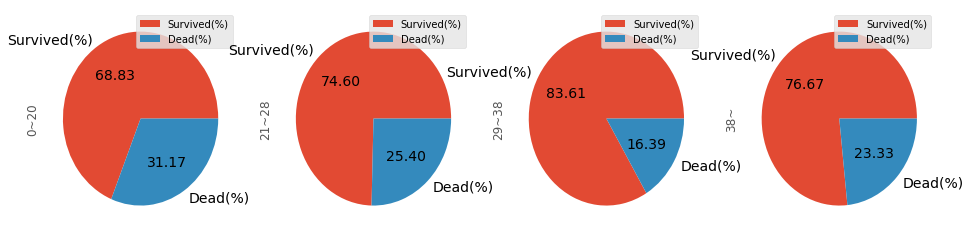

In [86]:
#Female

survived_age0 = train[(train["Survived"]==1) & (train["Sex"]=='female') & (train["Age"]<=20)]["Name"].count()
dead_age0 = train[(train["Survived"]==0) & (train["Sex"]=='female') & (train["Age"]<=20)]["Name"].count()

survived_age1 = train[(train["Survived"]==1) & (train["Sex"]=='female') & (train["Age"]>20) & (train["Age"]<=28)]["Name"].count()
dead_age1 = train[(train["Survived"]==0) & (train["Sex"]=='female') & (train["Age"]>20) & (train["Age"]<=28)]["Name"].count()

survived_age2 = train[(train["Survived"]==1) & (train["Sex"]=='female') & (train["Age"]>28) & (train["Age"]<=38)]["Name"].count()
dead_age2 = train[(train["Survived"]==0) & (train["Sex"]=='female') & (train["Age"]>28) & (train["Age"]<=38)]["Name"].count()

survived_age3 = train[(train["Survived"]==1) & (train["Sex"]=='female') & (train["Age"]>38)]["Name"].count()
dead_age3 = train[(train["Survived"]==0) & (train["Sex"]=='female') & (train["Age"]>38)]["Name"].count()

df = pd.DataFrame({'0~20':[survived_age0, dead_age0], 
                   '21~28':[survived_age1, dead_age1], 
                  '29~38':[survived_age2, dead_age2],
                  '38~':[survived_age3, dead_age3]},
                  index=['Survived(%)', 'Dead(%)'] )

df.plot(kind='pie', subplots=True, autopct='%.2f', fontsize=14, figsize=(16,4))

# about PClass (Ticket class)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


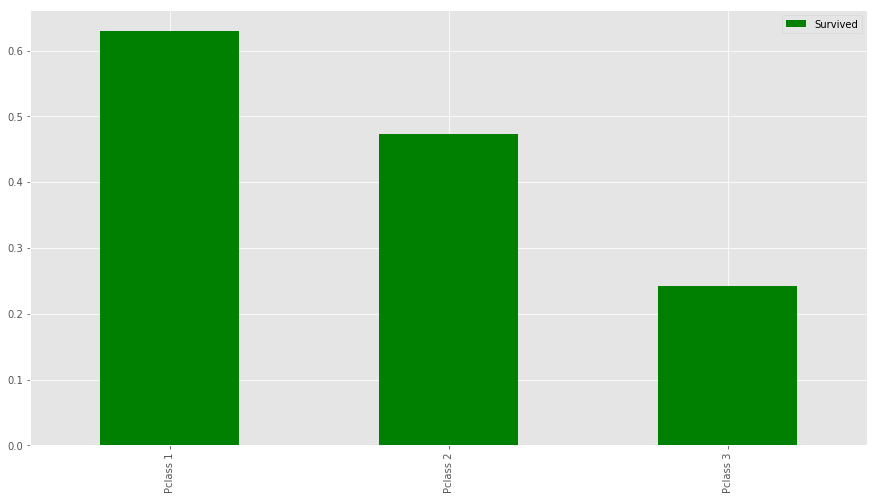

In [43]:
survived_mean = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(survived_mean)

df = pd.DataFrame(survived_mean['Survived'])
df.index = ['Pclass 1', 'Pclass 2', 'Pclass 3']
df.plot(kind='bar', color='g', figsize=(15,8))


In [75]:
train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


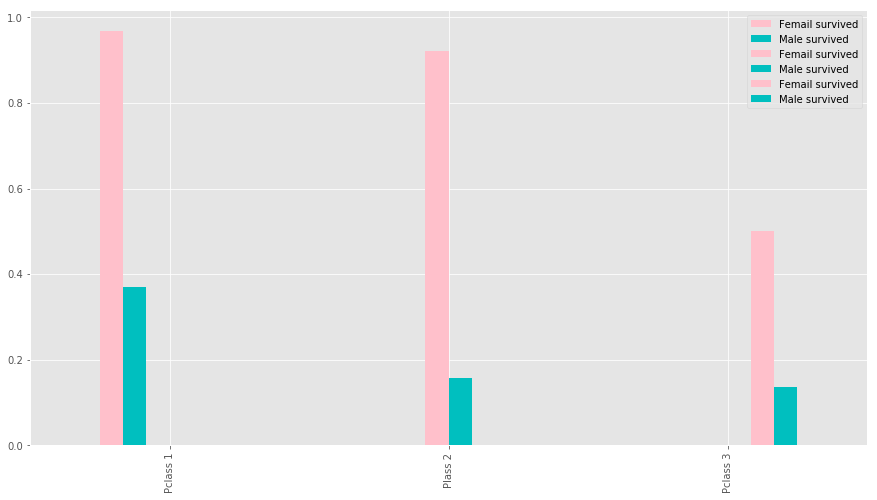

In [84]:
ds = train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], 
                                             as_index=False).mean().sort_values(by='Sex', ascending=False)

df = pd.DataFrame([ds[ds['Pclass']==1]['Survived'], ds[ds['Pclass']==2]['Survived'], ds[ds['Pclass']==3]['Survived']])
df.index = ['Pclass 1','Plass 2','Pclass 3']
df.columns = ['Femail survived', 'Male survived', 'Femail survived', 'Male survived', 'Femail survived', 'Male survived']
df.plot(kind='bar',stacked=False, figsize=(15,8), color=['pink','c'])



[0    0.031915
1    0.968085
Name: Survived, dtype: float64, 0    0.078947
1    0.921053
Name: Survived, dtype: float64, 0    0.5
1    0.5
Name: Survived, dtype: float64]


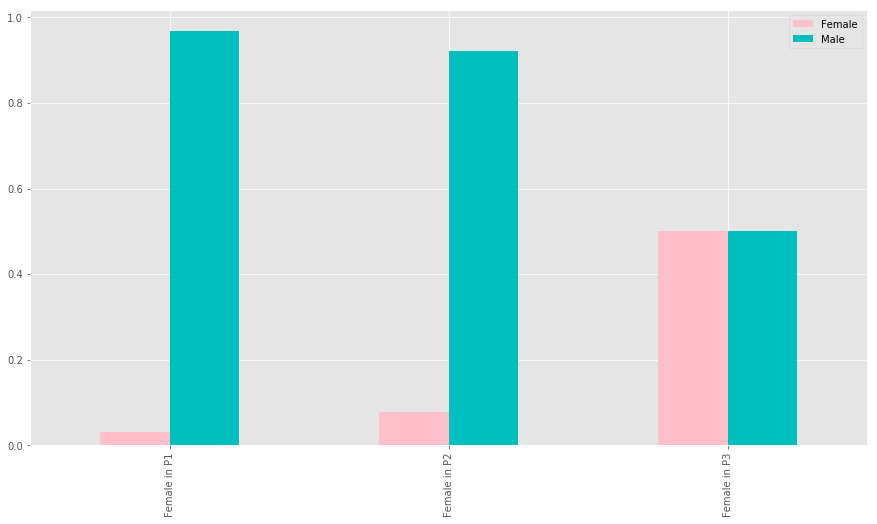

In [82]:

total_female_p1 = train[(train['Pclass']==1) & (train['Sex']=="female")]['Survived'].count()
female_p1 = train[(train['Pclass']==1) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p1

total_female_p2 = train[(train['Pclass']==2) & (train['Sex']=="female")]['Survived'].count()
female_p2 = train[(train['Pclass']==2) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p2

total_female_p3 = train[(train['Pclass']==3) & (train['Sex']=="female")]['Survived'].count()
female_p3 = train[(train['Pclass']==3) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p3

print([female_p1[[0, 1]],female_p2[[0, 1]],female_p3[[0, 1]]])

df = pd.DataFrame([female_p1[[0, 1]],female_p2[[0, 1]],female_p3[[0, 1]]])
df.index = ['Female in P1','Female in P2', 'Female in P3']
df.columns = ['Female', 'Male']
df.plot(kind='bar',stacked=False, figsize=(15,8), color=['pink','c'])

/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


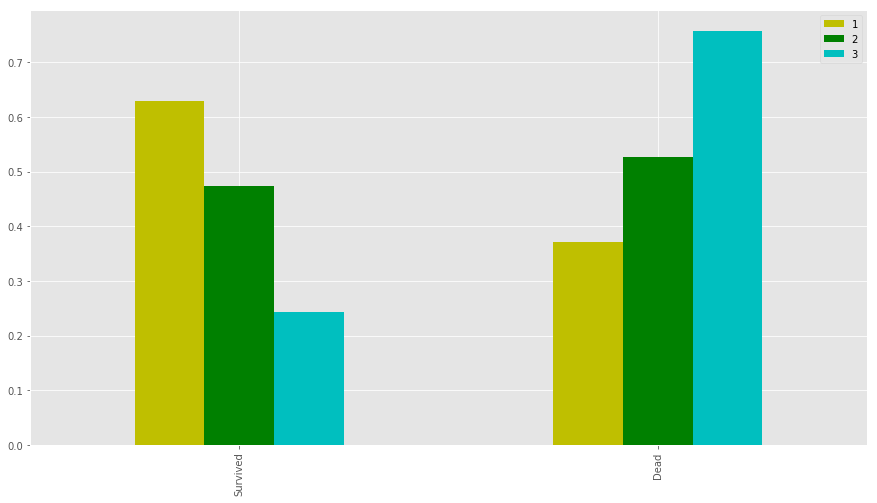

In [94]:
total_pclass = train['Pclass'].value_counts()
survived_pclass = train[train['Survived']==1]['Pclass'].value_counts()
dead_pclass = train[train['Survived']==0]['Pclass'].value_counts()
p_survived_pclass = survived_pclass / total_pclass
p_dead_pclass = dead_pclass / total_pclass

df = pd.DataFrame([p_survived_pclass,p_dead_pclass])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False, figsize=(15,8), colors=['y','g','c'])

/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


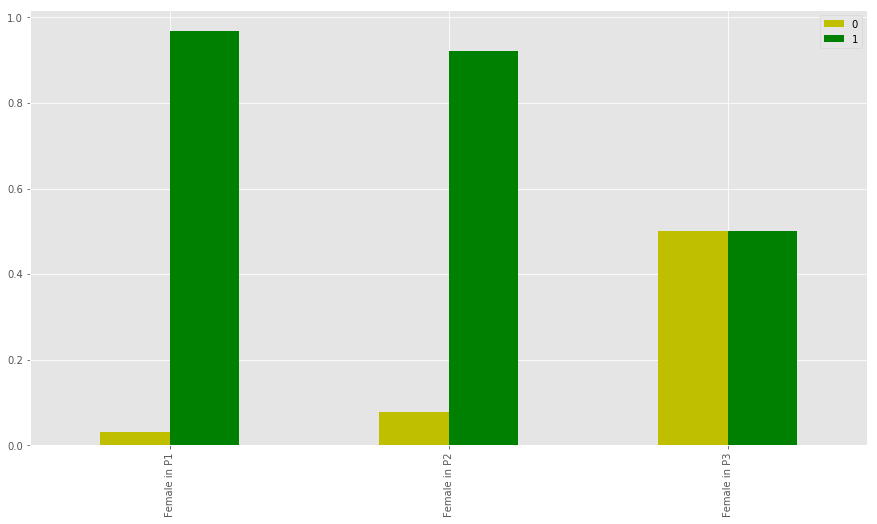

In [100]:
#femail in each Pclass
total_female_p1 = train[(train['Pclass']==1) & (train['Sex']=="female")]['Survived'].count()
female_p1 = train[(train['Pclass']==1) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p1

total_female_p2 = train[(train['Pclass']==2) & (train['Sex']=="female")]['Survived'].count()
female_p2 = train[(train['Pclass']==2) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p2

total_female_p3 = train[(train['Pclass']==3) & (train['Sex']=="female")]['Survived'].count()
female_p3 = train[(train['Pclass']==3) & (train['Sex']=="female")]['Survived'].value_counts() / total_female_p3

df = pd.DataFrame([female_p1[[0, 1]],female_p2[[0, 1]],female_p3[[0, 1]]])
df.index = ['Female in P1','Female in P2', 'Female in P3']
df.plot(kind='bar',stacked=False, figsize=(15,8), colors=['y','g','c'])

/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


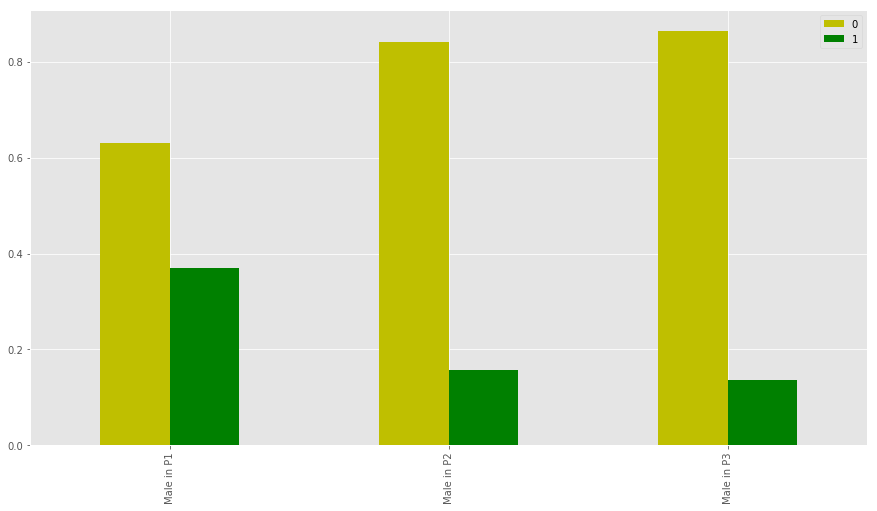

In [101]:
#male in each Pcalss

total_male_p1 = train[(train['Pclass']==1) & (train['Sex']=="male")]['Survived'].count()
male_p1 = train[(train['Pclass']==1) & (train['Sex']=="male")]['Survived'].value_counts() / total_male_p1

total_male_p2 = train[(train['Pclass']==2) & (train['Sex']=="male")]['Survived'].count()
male_p2 = train[(train['Pclass']==2) & (train['Sex']=="male")]['Survived'].value_counts() / total_male_p2

total_male_p3 = train[(train['Pclass']==3) & (train['Sex']=="male")]['Survived'].count()
male_p3 = train[(train['Pclass']==3) & (train['Sex']=="male")]['Survived'].value_counts() / total_male_p3

df = pd.DataFrame([male_p1[[0, 1]],male_p2[[0, 1]],male_p3[[0, 1]]])
df.index = ['Male in P1','Male in P2', 'Male in P3']
df.plot(kind='bar',stacked=False, figsize=(15,8), colors=['y','g','c'])

/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


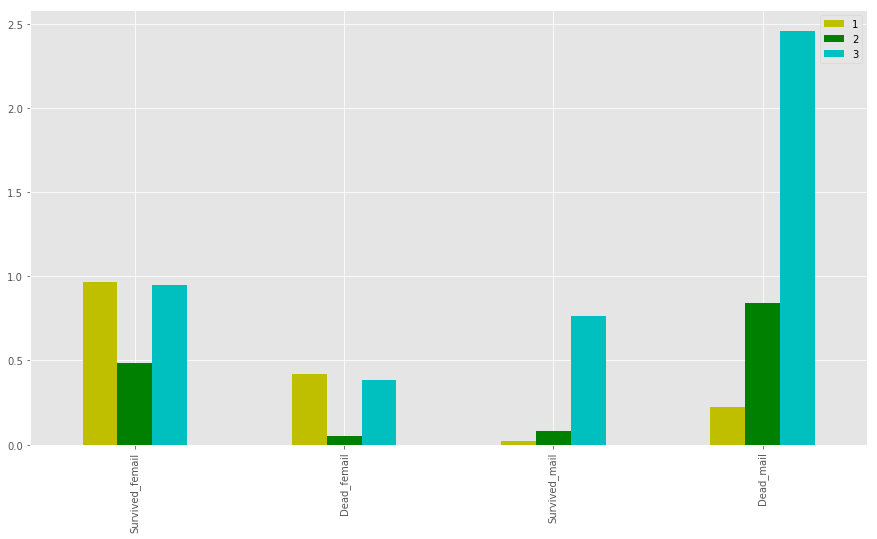

In [102]:

total_female_pclass_1 = train[(train['Pclass']==1) & (train['Sex']=="female")]['Survived'].count()
total_male_pclass_1 = train[(train['Pclass']==1) & (train['Sex']=="male")]['Survived'].count()

total_female_pclass_2 = train[(train['Pclass']==2) & (train['Sex']=="female")]['Survived'].count()
total_male_pclass_2 = train[(train['Pclass']==2) & (train['Sex']=="male")]['Survived'].count()

total_female_pclass_3 = train[(train['Pclass']==3) & (train['Sex']=="female")]['Survived'].count()
total_male_pclass_3 = train[(train['Pclass']==3) & (train['Sex']=="male")]['Survived'].count()

survived_female_pclass = train[(train['Survived']==1) & (train['Sex']=="female")]['Pclass'].value_counts()
survived_male_pclass = train[(train['Survived']==1) & (train['Sex']=="male")]['Pclass'].value_counts()
dead_pclass_female = train[(train['Survived']==0) & (train['Sex']=="female")]['Pclass'].value_counts()
dead_pclass_male = train[(train['Survived']==0) & (train['Sex']=="male")]['Pclass'].value_counts()

p_survived_pclass_female = (survived_female_pclass / [total_female_pclass_1, total_female_pclass_2, total_female_pclass_3]) 
p_survived_pclass_male = (survived_male_pclass / [total_male_pclass_1, total_male_pclass_2, total_male_pclass_3]) 
p_dead_pclass_female = (dead_pclass_female / [total_female_pclass_1, total_female_pclass_2, total_female_pclass_3]) 
p_dead_pclass_male = (dead_pclass_male / [total_male_pclass_1, total_male_pclass_2, total_male_pclass_3]) 

df = pd.DataFrame([p_survived_pclass_female,p_survived_pclass_male,p_dead_pclass_female,p_dead_pclass_male])
df.index = ['Survived_femail','Dead_femail','Survived_mail','Dead_mail']
df.plot(kind='bar',stacked=False, figsize=(15,8), colors=['y','g','c'])

/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


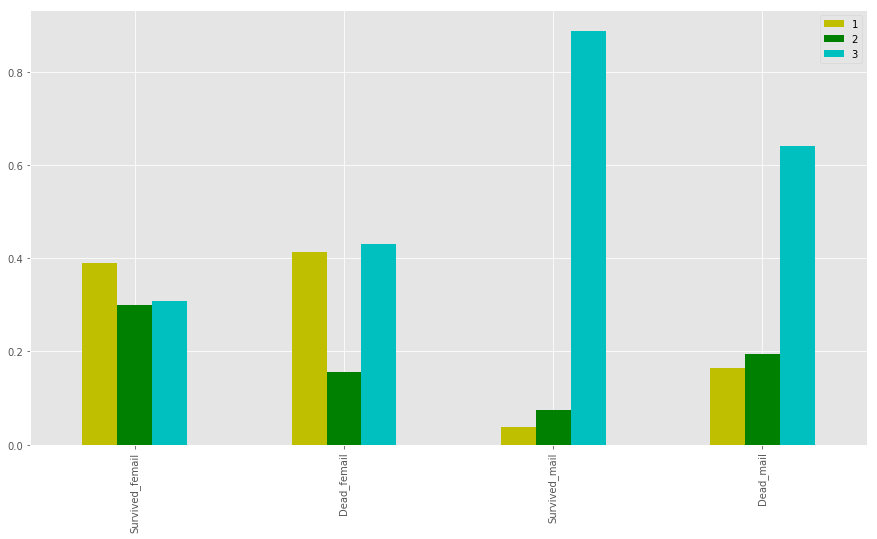

In [103]:
total_female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]['Pclass'].count()
total_male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]['Pclass'].count()

total_female_dead = train[(train['Survived']==0) & (train['Sex']=="female")]['Pclass'].count()
total_male_dead = train[(train['Survived']==0) & (train['Sex']=="male")]['Pclass'].count()

survived_pclass_female = train[(train['Survived']==1) & (train['Sex']=="female")]['Pclass'].value_counts()
survived_pclass_male = train[(train['Survived']==1) & (train['Sex']=="male")]['Pclass'].value_counts()
dead_pclass_female = train[(train['Survived']==0) & (train['Sex']=="female")]['Pclass'].value_counts()
dead_pclass_male = train[(train['Survived']==0) & (train['Sex']=="male")]['Pclass'].value_counts()

p_survived_pclass_female = (survived_pclass_female / total_female_survived) 
p_survived_pclass_male = (survived_pclass_male / total_male_survived) 
p_dead_pclass_female = (dead_pclass_female / total_female_dead) 
p_dead_pclass_male = (dead_pclass_male / total_male_dead) 

df = pd.DataFrame([p_survived_pclass_female,p_survived_pclass_male,p_dead_pclass_female,p_dead_pclass_male])
df.index = ['Survived_femail','Dead_femail','Survived_mail','Dead_mail']
df.plot(kind='bar',stacked=False, figsize=(15,8), colors=['y','g','c'])

# about Family

In [162]:
train['Family'] = train['SibSp'] + train['Parch']
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


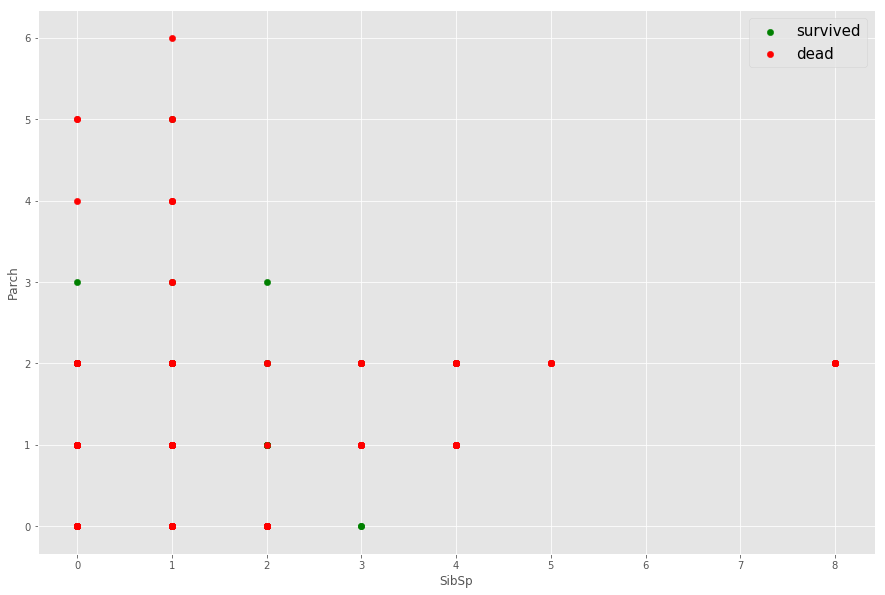

In [105]:
train['Family'] = train['SibSp'] + train['Parch']

plt.figure(figsize=(15,10))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['SibSp'],train[train['Survived']==1]['Parch'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['SibSp'],train[train['Survived']==0]['Parch'],c='red',s=40)
ax.set_xlabel('SibSp')
ax.set_ylabel('Parch')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

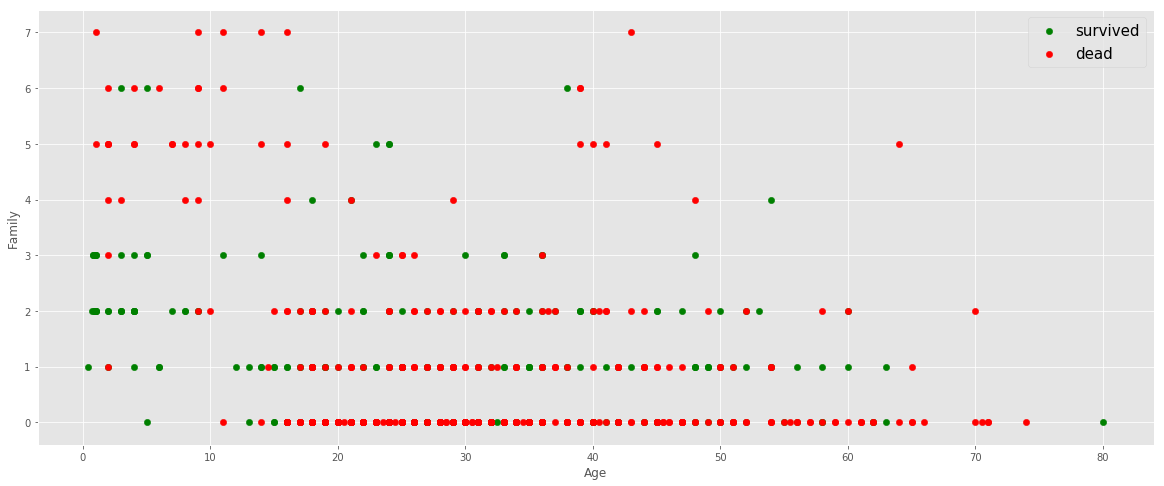

In [106]:
train['Family'] = train['SibSp'] + train['Parch']

plt.figure(figsize=(20,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Family'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Family'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Family')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

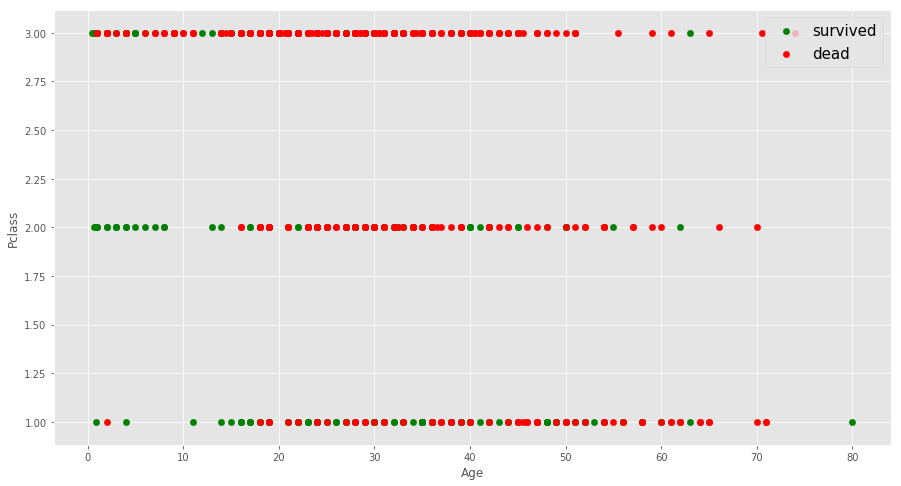

In [109]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Pclass'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Pclass'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

# about Fare

/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


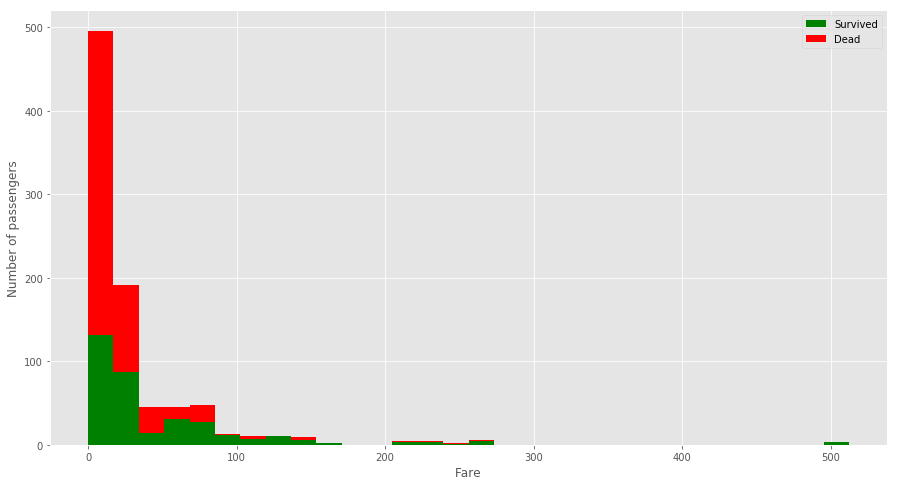

In [107]:

figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

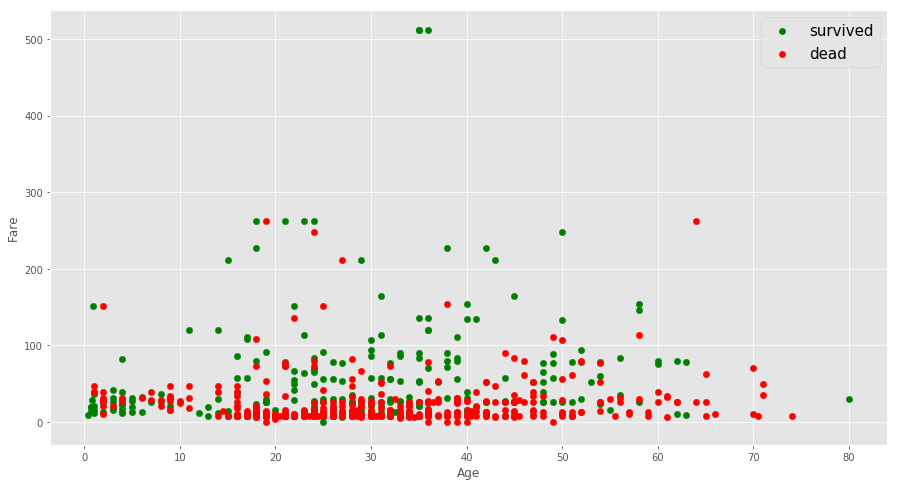

In [108]:

plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

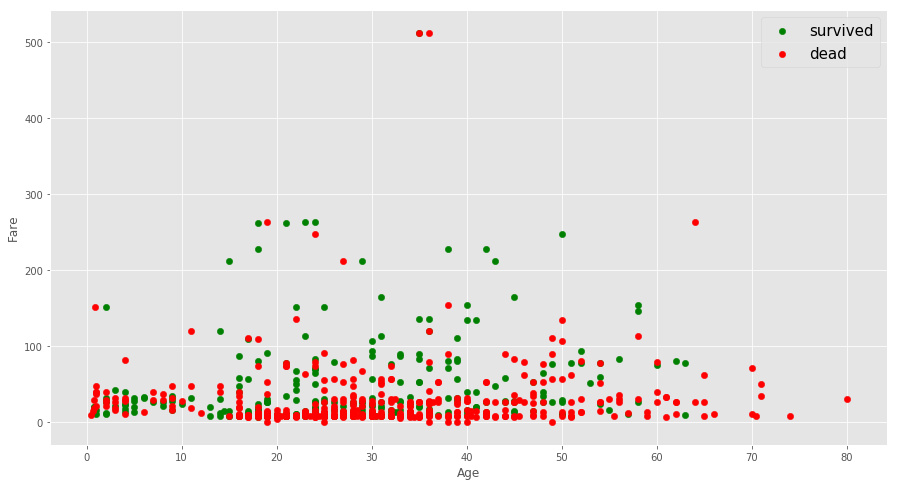

In [115]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Sex']=='female']['Age'],train[train['Sex']=='female']['Fare'],c='green',s=40)
ax.scatter(train[train['Sex']=='male']['Age'],train[train['Sex']=='male']['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

In [161]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


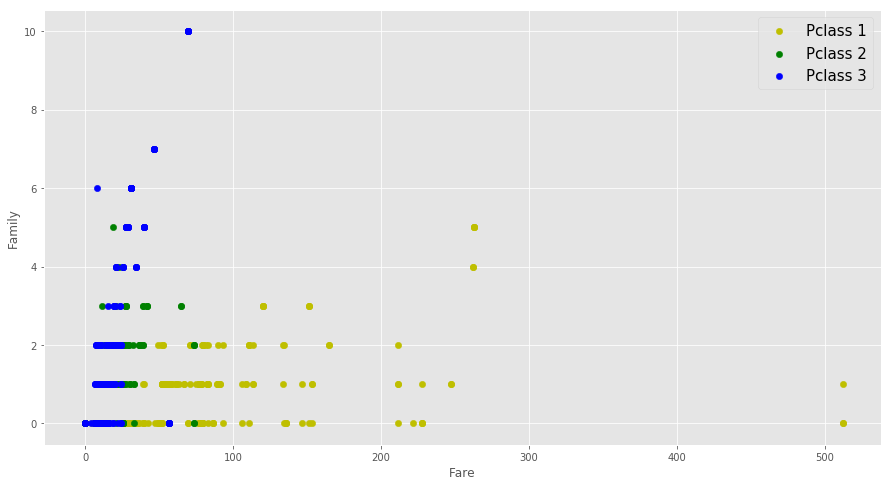

In [166]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Pclass']==1]['Fare'], train[train['Pclass']==1]['Family'],c='y',s=40)
ax.scatter(train[train['Pclass']==2]['Fare'], train[train['Pclass']==2]['Family'],c='g',s=40)
ax.scatter(train[train['Pclass']==3]['Fare'], train[train['Pclass']==3]['Family'],c='b',s=40)
ax.set_xlabel('Fare')
ax.set_ylabel('Family')
ax.legend(('Pclass 1','Pclass 2', 'Pclass 3'),scatterpoints=1,loc='upper right',fontsize=15,)

# about Embarked

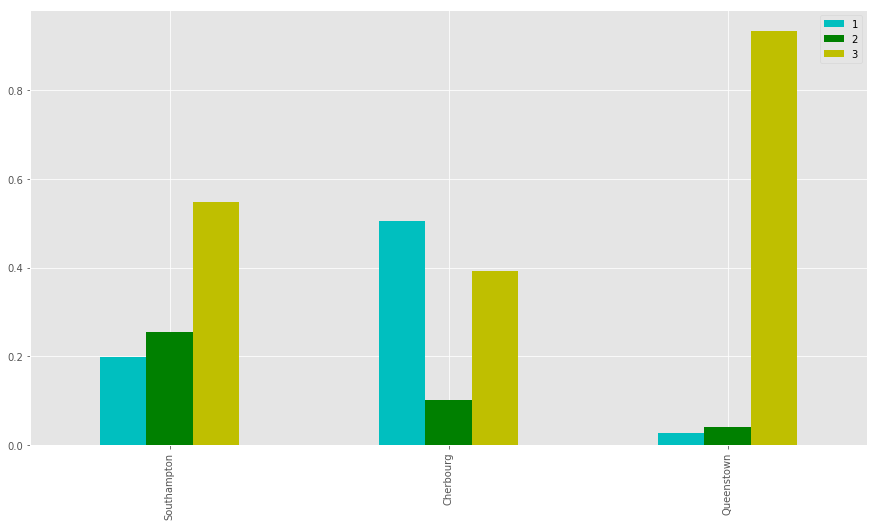

In [112]:
total_Pclass_S = train[train['Embarked']=='S']['Pclass'].count()
total_Pclass_C = train[train['Embarked']=='C']['Pclass'].count()
total_Pclass_Q = train[train['Embarked']=='Q']['Pclass'].count()

Embarked_S = train[train['Embarked']=='S']['Pclass'].value_counts() / total_Pclass_S
Embarked_C = train[train['Embarked']=='C']['Pclass'].value_counts() / total_Pclass_C
Embarked_Q = train[train['Embarked']=='Q']['Pclass'].value_counts() / total_Pclass_Q   
              
df = pd.DataFrame([Embarked_S,Embarked_C,Embarked_Q])
df.index = ['Southampton','Cherbourg','Queenstown']
df.plot(kind='bar',stacked=False, figsize=(15,8), color=['c','g','y'])

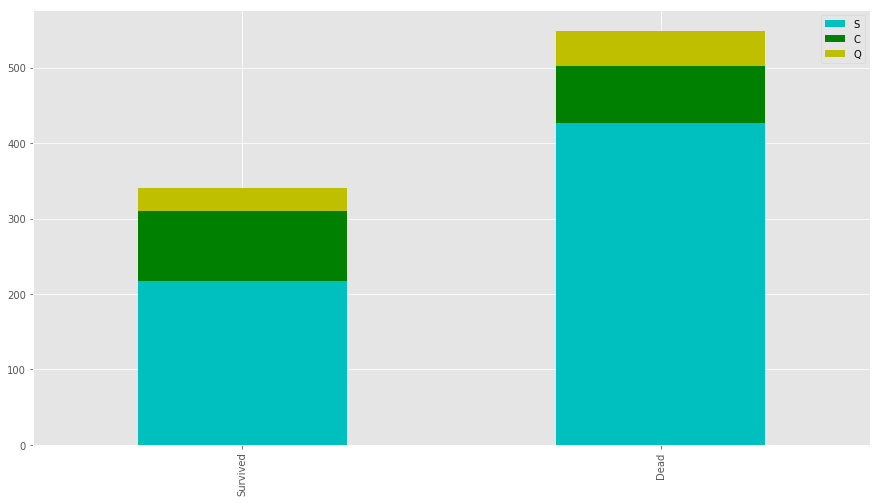

In [113]:

survived_embark = train[train['Survived']==1]['Embarked'].value_counts()
dead_embark = train[train['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8), color=['c','g','y'])

# about Family

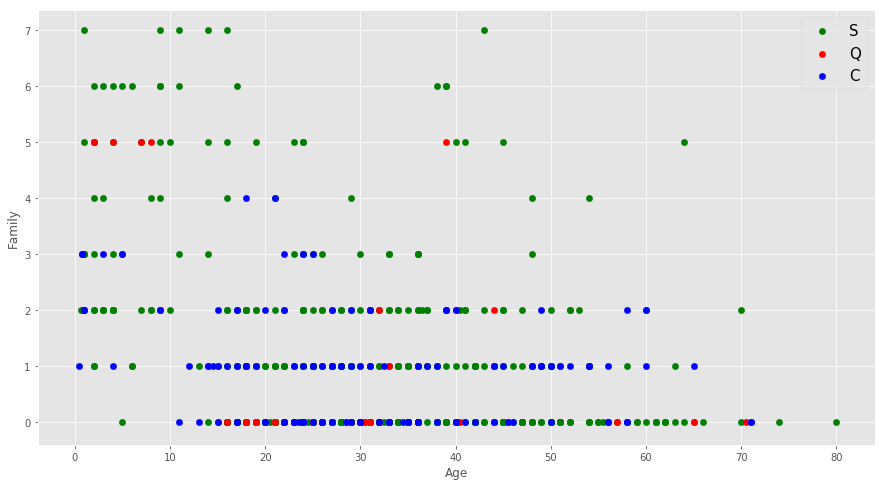

In [114]:
train['Family'] = train['SibSp'] + train['Parch']

plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Embarked']=='S']['Age'],train[train['Embarked']=='S']['Family'],c='green',s=40)
ax.scatter(train[train['Embarked']=='Q']['Age'],train[train['Embarked']=='Q']['Family'],c='red',s=40)
ax.scatter(train[train['Embarked']=='C']['Age'],train[train['Embarked']=='C']['Family'],c='blue',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Family')
ax.legend(('S','Q','C'),scatterpoints=1,loc='upper right',fontsize=15,)

# Feature engineerig

In [116]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Y_train = train.Survived
Y_train_onehot = pd.get_dummies(train['Survived']).values
X_train = train.append(test)

In [119]:
X_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [120]:
def fill_Age():
    global X_train
    
    mask =  (X_train["Age"].isnull()) & ( (X_train['Name'].str.contains("Ms.")) | (X_train['Name'].str.contains("Miss.")) )
    mask2 = ( (X_train['Name'].str.contains("Ms.")) | (X_train['Name'].str.contains("Miss.")) )
    X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train.loc[mask2,'Age'].mean())
    
    mask =  (X_train["Age"].isnull()) & ( (X_train['Name'].str.contains("Mr.")) | (X_train['Name'].str.contains("Sir.")) )
    mask2 =  ( (X_train['Name'].str.contains("Mr.")) | (X_train['Name'].str.contains("Sir.")) )
    X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train.loc[mask2,'Age'].mean())
    
    mask =  (X_train["Age"].isnull()) & ( X_train['Name'].str.contains("Master.") )
    X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train[X_train['Name'].str.contains("Master.")]["Age"].mean())

    mask =  (X_train["Age"].isnull()) & ( X_train['Name'].str.contains("Dr\.") )
    X_train.loc[mask,'Age'] = X_train.loc[mask,'Age'].fillna(X_train[X_train['Name'].str.contains("Dr\.")]["Age"].mean())


fill_Age()
X_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.961404,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.196057,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.803744,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [121]:
def update_Fare():
    #X_train[(X_train['Fare']>0.0) & (X_train['Fare']<8.0)].count()
    mask = (X_train['Fare']==0)
    X_train.loc[mask, "Fare"] = 0.0

    mask = (X_train['Fare']>0.0) & (X_train['Fare']<=8.0)
    X_train.loc[mask, "Fare"] = 1.0

    mask = (X_train['Fare']>8.0) & (X_train['Fare']<=15.0)
    X_train.loc[mask, "Fare"] = 2.0

    mask = (X_train['Fare']>15.0) & (X_train['Fare']<=32.0)
    X_train.loc[mask, "Fare"] = 3.0

    mask = (X_train['Fare']>32.0)
    X_train.loc[mask, "Fare"] = 4.0
    
    X_train['Fare'].fillna(X_train['Fare'].median(), inplace=True)

update_Fare()

In [122]:
def fill_Embarked():
    X_train['Embarked'].fillna("C", inplace=True)
    
fill_Embarked()
X_train.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


In [123]:
X_train.drop('Parch',axis=1,inplace=True)
X_train.drop('SibSp',axis=1,inplace=True)

In [124]:

def fill_Carbin():
    
    global X_train
    
    X_train['Cabin'].fillna("-", inplace=True)
    cabinList = ["C", "E", "G", "D", "A", "B", "F"]

    for Cabin in cabinList:
        mask =  (X_train["Cabin"].str.contains(Cabin))
        X_train.loc[mask,"Cabin"] = Cabin

   
    mask = (X_train["Pclass"]==3) & (X_train["Cabin"]=="-")
    X_train.loc[mask, "Cabin"] = "G"

    mask = (X_train["Pclass"]==1) & (X_train["Cabin"]=="-")
    X_train.loc[mask, "Cabin"] = "B"
    
    mask = (X_train["Pclass"]==2) & (X_train["Cabin"]=="-")
    X_train.loc[mask, "Cabin"] = "F"

    #mask = (X_train["Survived"].isnull()) & (X_train["Cabin"]=="-") & (X_train["Pclass"]==1)
    #X_train.loc[mask, "Cabin"] = "B"

    #mask = (X_train["Survived"].isnull()) & (X_train["Cabin"]=="-") & (X_train["Pclass"]==2)
    #X_train.loc[mask, "Cabin"] = "F"

    #mask = (X_train["Survived"].isnull()) & (X_train["Cabin"]=="-") & (X_train["Pclass"]==3)
    #X_train.loc[mask, "Cabin"] = "G"

    
fill_Carbin()
X_train.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,1309,1309,1309,1309,1309
unique,8,3,1307,2,929
top,G,S,"Connolly, Miss. Kate",male,CA. 2343
freq,702,914,2,843,11


In [125]:
def fill_Ticket():
    global X_train

    X_train['Ticket'] = X_train['Ticket'].str.extract('([a-zA-Z]*)', expand=False).str.upper()

fill_Ticket()
X_train.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,1309,1309,1309,1309,1309
unique,8,3,1307,2,21
top,G,S,"Connolly, Miss. Kate",male,
freq,702,914,2,843,957


In [127]:
def fill_Title():
    global X_train
    
    for typeName in ["Ms.", "Miss.", "Mr.", "Sir.", "Major", "Dr.", "Master.", "Mme."]:

        mask =  (X_train['Name'].str.contains(typeName))

        replaceTitle = typeName
        if(typeName=="Mme."):
           replaceTitle = "Ms." 

        X_train.loc[mask,'Title'] = replaceTitle

    
    mask = X_train["Title"].isnull() & (X_train['Age']<14) & (X_train['Sex']=='male')
    X_train.loc[mask, "Title"] = "Master."
    
    mask = X_train["Title"].isnull() & (X_train['Age']>13) & (X_train['Sex']=='male')
    X_train.loc[mask, "Title"] = "Mr."

    mask = X_train["Title"].isnull() & (X_train['Sex']=='female')
    X_train.loc[mask, "Title"] = "Miss."
        
fill_Title()
X_train.drop('Name',axis=1,inplace=True)

X_train.describe(include=['O'])

,Cabin,Embarked,Sex,Ticket,Title
count,1309,1309,1309,1309,1309
unique,8,3,2,21,7
top,G,S,male,,Mr.
freq,702,914,843,957,965


In [128]:
def oneHotEncode():
    global X_train
    
    X_train.drop('PassengerId', inplace=True, axis=1)    
    X_train['Sex'] = X_train['Sex'].map({'male':1,'female':0})
    
    
    X_train['Embarked'] = X_train['Embarked'].astype('category').cat.codes
    X_train['Pclass'] = X_train['Pclass'].astype('category').cat.codes
    X_train['Title'] = X_train['Title'].astype('category').cat.codes
    X_train['Cabin'] = X_train['Cabin'].astype('category').cat.codes
    X_train['Ticket'] = X_train['Ticket'].astype('category').cat.codes
    
    '''
    dummy = pd.get_dummies(X_train['Pclass'], prefix="Pclass")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Pclass',axis=1,inplace=True)
    
    dummy = pd.get_dummies(X_train['Ticket'], prefix="Ticket")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Ticket',axis=1,inplace=True)
    
    dummy = pd.get_dummies(X_train['Cabin'], prefix="Cabin")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Cabin',axis=1,inplace=True)
    
    dummy = pd.get_dummies(X_train['Embarked'], prefix="Embarked")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Embarked',axis=1,inplace=True)
    
    dummy = pd.get_dummies(X_train['Title'], prefix="Title")
    X_train = pd.concat([X_train,dummy],axis=1)
    X_train.drop('Title',axis=1,inplace=True)
    '''
    
oneHotEncode()

In [129]:
X_train = X_train.drop("Survived", axis=1)
X_test = X_train.iloc[891:]
X_train = X_train.head(891)
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Machine learning

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, cross_validation

/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [131]:

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = cross_validation.cross_val_predict(LogisticRegression(), X_train, Y_train, cv=10)

acc_log = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.81      0.85      0.83       549
          1       0.74      0.68      0.71       342

avg / total       0.78      0.79      0.78       891



In [133]:
# Support Vector Machines

Y_pred = cross_validation.cross_val_predict(SVC(), X_train, Y_train, cv=10)
acc_svc = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.79      0.82      0.80       549
          1       0.69      0.64      0.67       342

avg / total       0.75      0.75      0.75       891



In [134]:
#KNN

Y_pred = cross_validation.cross_val_predict(KNeighborsClassifier(n_neighbors = 3), X_train, Y_train, cv=10)
acc_knn = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.77      0.83      0.80       549
          1       0.69      0.60      0.64       342

avg / total       0.74      0.74      0.74       891



In [135]:
# Gaussian Naive Bayes

Y_pred = cross_validation.cross_val_predict(GaussianNB(), X_train, Y_train, cv=10)
acc_gaussian = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.84      0.73      0.78       549
          1       0.64      0.78      0.71       342

avg / total       0.77      0.75      0.75       891



In [136]:
# Perceptron

Y_pred = cross_validation.cross_val_predict(Perceptron(), X_train, Y_train, cv=10)
acc_perceptron = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.78      0.25      0.38       549
          1       0.42      0.88      0.57       342

avg / total       0.64      0.49      0.46       891



/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/chtseng/dp-keras/keras

In [137]:
# Linear SVC

Y_pred = cross_validation.cross_val_predict(LinearSVC(), X_train, Y_train, cv=10)
acc_linear_svc = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.84      0.76      0.79       549
          1       0.66      0.76      0.71       342

avg / total       0.77      0.76      0.76       891



In [138]:
# Stochastic Gradient Descent

Y_pred = cross_validation.cross_val_predict(SGDClassifier(), X_train, Y_train, cv=10)
acc_sgd = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.67      0.87      0.76       549
          1       0.61      0.32      0.42       342

avg / total       0.65      0.66      0.63       891



/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/chtseng/dp-keras/keras/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/hom

In [150]:
# Decision Tree

Y_pred = cross_validation.cross_val_predict(DecisionTreeClassifier(), X_train, Y_train, cv=10)
acc_decision_tree = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       549
          1       0.73      0.72      0.72       342

avg / total       0.79      0.79      0.79       891



In [152]:
# Random Forest

Y_pred = cross_validation.cross_val_predict(RandomForestClassifier(n_estimators=100), X_train, Y_train, cv=10)
acc_random_forest = metrics.accuracy_score(Y_train, Y_pred)
print (metrics.classification_report(Y_train, Y_pred) )

             precision    recall  f1-score   support

          0       0.83      0.87      0.85       549
          1       0.78      0.72      0.75       342

avg / total       0.81      0.81      0.81       891



In [141]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.818182
8,Decision Tree,0.787879
2,Logistic Regression,0.786756
7,Linear SVC,0.757576
0,Support Vector Machines,0.753086
4,Naive Bayes,0.750842
1,KNN,0.744108
6,Stochastic Gradient Decent,0.658810
5,Perceptron,0.494949


## Features selection

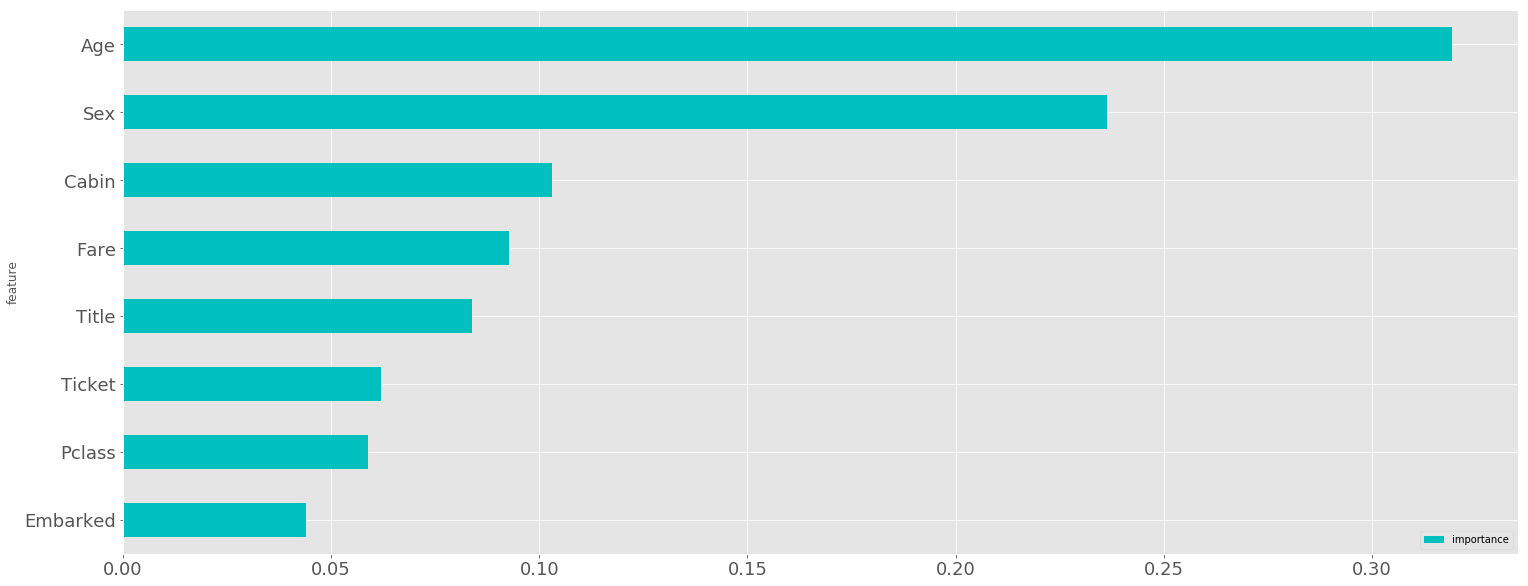

In [146]:
clf = RandomForestClassifier(n_estimators=1000, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 10), color='c', fontsize=18)

In [154]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
train_reduced.shape

(891, 2)

In [155]:
test_reduced = model.transform(X_test)
test_reduced.shape

(418, 2)

In [156]:
from sklearn.cross_validation import cross_val_score

parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 1000, 
              'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)
#Y_pred = model.predict(X_test)

In [157]:
print("no feature selection: ", compute_score(model, X_train, Y_train, scoring='accuracy'))
print("with feature selection: ", compute_score(model, train_reduced, Y_train, scoring='accuracy'))

no feature selection:  0.824943018746
with feature selection:  0.78112843275


In [158]:
Y_pred = model.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('Titanic-submission.csv', index=False)